# Day 1: Python Data Structures

### Setup: Before you start, run this cell to make sure you have the necessary libraries.


In [2]:

!pip install numpy scipy scikit-image matplotlib


### Practical 1: Lists vs. NumPy — The Convolution Race

### **Concept:** Convolution is a fundamental operation in signal and image processing. We'll test three ways to do it.

In [ ]:
import random
import numpy as np
import time
from scipy.signal import convolve, fftconvolve

# 1. Pure Python convolution function
def python_convolve(signal, kernel):

    """
    Calculates the 1D convolution with mode='full'.
    The output list should be len(signal) + len(kernel) - 1 long.
    """
    sig_len = len(signal)
    ker_len = len(kernel)
    out_len = sig_len + ker_len - 1
    output = [0.0] * out_len
    
    for n in range(out_len):
        for k in range(ker_len):
            if  n-k<sig_len and n-k>=0:
                output[n] += kernel[k]*signal[n-k]  

    return output

def python_fast_convolve(signal, kernel):

    """
    Calculates the 1D convolution with mode='full'.
    The output list should be len(signal) + len(kernel) - 1 long.
    """
    sig_len = len(signal)
    ker_len = len(kernel)
    out_len = sig_len + ker_len - 1
    output = [0.0] * out_len
    
    for i in range(sig_len):
        for j in range(ker_len):
            output[i+j] += signal[i]*kernel[j]  

    return output

# 2. Generate Data
signal_list = [random.random() for _ in range(10000)]
kernel_list = [random.random() for _ in range(1000)]

signal_np = np.array(signal_list)
kernel_np = np.array(kernel_list)

print(f"Signal length: {len(signal_list)}")
print(f"Kernel length: {len(kernel_list)}")

# 3. Time the Runtimes 

print("\nTiming your function...")
start_py = time.time()
result_py = python_convolve(signal_list, kernel_list)
end_py = time.time()
print(f"Pure Python time: {end_py - start_py:.4f} seconds")
print(len(result_py))


print("\nTiming your faster function...")
start_py = time.time()
result_py = python_fast_convolve(signal_list, kernel_list)
end_py = time.time()
print(f"Pure Python time: {end_py - start_py:.4f} seconds")
print(len(result_py))

# Time np.convolve
start_np = time.time()
result_np = np.convolve(signal_np, kernel_np)
end_np = time.time()
print(f"NumPy convolve time: {end_np - start_np:.4f} seconds")

# Time scipy.signal.fftconvolve
start_fft = time.time()
result_fft = fftconvolve(signal_np, kernel_np)
end_fft = time.time()
print(f"FFT convolve time: {end_fft - start_fft:.4f} seconds")

Signal length: 10000
Kernel length: 1000

Timing your function...
Pure Python time: 4.0788 seconds
10999

Timing your faster function...
Pure Python time: 2.4057 seconds
10999
NumPy convolve time: 0.0020 seconds
FFT convolve time: 0.0020 seconds


#### Challenge Question
##### How would you modify your `python_convolve` function to implement `mode='same'`? (The output length is the same as the input `signal` length).

### Practical 2: Dictionaries as a "Mini-Database"
### **Concept:** A Python `dict` is a hash map, just like a database index. A list of dicts is a common way to represent a table.


In [ ]:
# Your Data
students_table = [
    {'student_id': 's101', 'name': 'Luke', 'major': 'BME'},
    {'student_id': 's102', 'name': 'Yiwen', 'major': 'CS'},
    {'student_id': 's103', 'name': 'Ziyang', 'major': 'CS'}
]

grades_table = [
    {'student_id': 's101', 'course': 'Intro to ML', 'grade': 95},
    {'student_id': 's102', 'course': 'Data Structures', 'grade': 88},
    {'student_id': 's101', 'course': 'Image Processing', 'grade': 92},
    {'student_id': 's103', 'course': 'Data Structures', 'grade': 91}
]
# 1. Recode `SELECT * ... WHERE name = 'Luke'`
def select_by_name(table, name):
    """Performs a 'table scan' (O(N)) on a list of dicts."""
    for student in table:
        if "Luke" in student.values():
            return student.values()

print(f"Q1 Result: {select_by_name(students_table, 'Luke')}")

# 2. Build an Index
# def build_index(table, key_name):
#     """Builds a dict (hash map) index for O(1) lookups."""
#     index={}
#     for row in table:
#         index.update({row.get(key_name): row})
#     return index

def build_index(table,key_name):
    index = {}
    for row in table:
        key = row[key_name] # For instance, we retrieve one student id 
        index[key] = row # And we create a new key, value couple in the index
    return index  

student_index = build_index(students_table, 'student_id')
print(f"\nQ2 Index: {student_index}")

def select_by_id(index, student_id):
    return(index.get(student_id))

print(f"Q2 Result: {select_by_id(student_index, 's101')}")

# 3. Recode a `JOIN` (Challenge Question / Hash Join)
def join_student_grades_hash(student_index, grades_table):
    """
    Performs a 'hash join' (O(M)) by using the pre-built index.
    SQL: SELECT s.name, g.course, g.grade 
         FROM students_table s JOIN grades_table g 
         ON s.student_id = g.student_id;
    """
    joined_data = []

    for grade_row in grades_table:
        
        key = grade_row["student_id"]
        student_row = select_by_id(student_index, key)

        if student_row != None: # Verification to ensure the student was found in the student_index mentioned above
            joined_data.append((student_row["name"], grade_row["course"], grade_row["grade"])) # Appending a tuple made up of three elements // 
            # student_row, grade_row are dicts. 

    return joined_data

print(f"\nQ3 (Challenge) Result: {join_student_grades_hash(student_index, grades_table)}")

Q1 Result: dict_values(['s101', 'Luke', 'BME'])

Q2 Index: {'s101': {'student_id': 's101', 'name': 'Luke', 'major': 'BME'}, 's102': {'student_id': 's102', 'name': 'Yiwen', 'major': 'CS'}, 's103': {'student_id': 's103', 'name': 'Ziyang', 'major': 'CS'}}
Q2 Result: {'student_id': 's101', 'name': 'Luke', 'major': 'BME'}

Q3 (Challenge) Result: [('Luke', 'Intro to ML', 95), ('Yiwen', 'Data Structures', 88), ('Luke', 'Image Processing', 92), ('Ziyang', 'Data Structures', 91)]



##### Advanced Dictionary Challenge
##### **Objective:** Perform aggregation and filtering operations.

In [51]:
students_table = [
    {'student_id': 's101', 'name': 'Luke', 'major': 'BME'},
    {'student_id': 's102', 'name': 'Yiwen', 'major': 'CS'},
    {'student_id': 's103', 'name': 'Ziyang', 'major': 'CS'},
    {'student_id': 's104', 'name': 'Jianpeng', 'major': 'BME'},
    {'student_id': 's105', 'name': 'Yutong', 'major': 'Robotics'}
]

grades_table = [
    {'student_id': 's101', 'course': 'Image Processing', 'grade': 92},
    {'student_id': 's102', 'course': 'Data Structures', 'grade': 88},
    {'student_id': 's103', 'course': 'Data Structures', 'grade': 91},
    {'student_id': 's101', 'course': 'Intro to ML', 'grade': 95},
    {'student_id': 's104', 'course': 'Image Processing', 'grade': 85},
    {'student_id': 's105', 'course': 'Intro to ML', 'grade': 81},
    {'student_id': 's102', 'course': 'Intro to ML', 'grade': 94},
    {'student_id': 's103', 'course': 'Algorithms', 'grade': 78},
    {'student_id': 's101', 'course': 'Calculus', 'grade': 88},
    {'student_id': 's104', 'course': 'Calculus', 'grade': 90},
    {'student_id': 's102', 'course': 'Algorithms', 'grade': 85},
]

##### Task 1: Compute Average Grade per Student

**Goal:** Create a dictionary where the key is the student's *name* and the value is their *average grade*.

**SQL Equivalent:**
`SELECT s.name, AVG(g.grade) FROM students s JOIN grades g ON s.student_id = g.student_id GROUP BY s.name;`


In [64]:
def calculate_student_averages(students, grades):
    student_index = build_index(students, "student_id")
    # We need two new dictionnaries : grade_sum, grade_count

    grade_sum={} 
    grade_count={}

    for row in grades:
        student_id = row['student_id']
        grade = row['grade']
        grade_sum[student_id] = grade_sum.get(student_id, 0) + grade
        grade_count[student_id] = grade_count.get(student_id, 0) + 1    
    
    final_table={}
    student_averages = {}
    
    for student_id in grade_sum:
        
        average = grade_sum.get(student_id)/grade_count.get(student_id) 
        name = student_index[student_id].get("name")
        student_averages[name] = average
        
    return student_averages

calculate_student_averages(students_table, grades_table)

{'Luke': 91.66666666666667,
 'Yiwen': 89.0,
 'Ziyang': 84.5,
 'Jianpeng': 87.5,
 'Yutong': 81.0}

##### Task 2: Find Students in a Class

**Goal:** Write a function that takes a `course_name` and returns a `list` of student *names* who took that class.

**SQL Equivalent:**

`SELECT s.name FROM students s JOIN grades g ON s.student_id = g.student_id WHERE g.course = 'Intro to ML';`

**Expected Output for 'Intro to ML':**


 `['Luke', 'Yutong', 'Yiwen']`

In [77]:
# def find_students(course_name):
#     student_index = build_index(students_table, "student_id")
#     class_ids=[]
#     list=[]
#     for row in grades_table:
#         if row["course"]==course_name:
#             id = row["student_id"]
#             if id not in class_ids:
#                 class_ids.append(id)
#     for i in class_ids:
#         list.append(student_index[str(i)].get("name"))
#     return list

def find_students(course_name):
    student_index = build_index(students_table, "student_id")
    class_ids=set()
    class_names=[]
    for row in grades_table:
        if row["course"]==course_name:
            id = row["student_id"]
            class_ids.add(id)
    for i in class_ids:
        class_names.append(student_index[str(i)].get("name"))
    return class_names

print(find_students("Image Processing"))

['Luke', 'Jianpeng']


### Practical 3: Sets & Hashing for Image Analysis
### **Concept:** A `set` (hash set) is a hash table that only stores keys. It's perfect for uniqueness and fast O(1) membership testing.


In [ ]:
# %%
from skimage import data
import matplotlib.pyplot as plt

# Load a 3D color image (Height x Width x Channels)
image_rgb = data.coffee()
print(f"Image dimensions: {image_rgb.shape}") # (H, W, 3)

pixel_list = []
pixel_set = set()

# Challenge Question: Color Histogram
color_histogram = {}

print("Iterating over pixels...")
# 1. Iterate over every pixel
for r in range(image_rgb.shape[0]):
    for c in range(image_rgb.shape[1]):
        
        # YOUR CODE HERE
        # 1. Convert the pixel at image_rgb[r, c] to a *tuple* so it's hashable.
        pixel = tuple((image_rgb[r,c]))

        # 2. Append the tuple to `pixel_list`.
        pixel_list.append(pixel)
        
        # 3. Add the tuple to `pixel_set`.
        pixel_set.add(pixel)

        # 4. (Challenge) Add the tuple to `color_histogram` and update its count.
        color_histogram[pixel] = color_histogram.get(pixel,0)+1
        #Hint: `my_dict[key] = my_dict.get(key, 0) + 1` is a useful pattern.

print("...Iteration complete.")

# 2. Analyze the results (This code will run once your loop is complete)
print(f"\nTotal number of pixels (from list): {len(pixel_list)}")
print(f"Number of UNIQUE colors (from set): {len(pixel_set)}")

# 3. Explain: 
print("\nQ3: Why the difference? Some colors are redundant: they appear multiple times in a list, but only once in a set.")

# 4. Time the lookup (This code will run once your loop is complete)
test_pixel = tuple(image_rgb[150, 150]) 

start_list_search = time.time()
_ = test_pixel in pixel_list
end_list_search = time.time()
print(f"\nTime to find pixel in list: {end_list_search - start_list_search:.6f} seconds (Slow, O(N))")

start_set_search = time.time()
_ = test_pixel in pixel_set
end_set_search = time.time()
print(f"Time to find pixel in set:  {end_set_search - start_set_search:.6f} seconds (Fast, O(1))")

# 5. Explain:
print("\nQ5: Why is the set faster? The set is faster because it has a lower complexity O(1) for searches")

# Challenge Result
most_common_color = max(color_histogram, key=color_histogram.get)
print(f"Challenge - Most common color: {most_common_color} (Count: {color_histogram[most_common_color]})")

Image dimensions: (400, 600, 3)
Iterating over pixels...
...Iteration complete.

Total number of pixels (from list): 240000
Number of UNIQUE colors (from set): 94478

Q3: Why the difference? Some colors are redundant, they appear multiple times in a list, but only once in a set.

Time to find pixel in list: 0.000000 seconds (Slow, O(N))
Time to find pixel in set:  0.000000 seconds (Fast, O(1))

Q5: Why is the set faster? The set is faster because it has a lower complexity O(1) for searches
Challenge - Most common color: (36, 3, 2) (Count: 516)



### Practical 4: Matrices (NumPy) for Edge Detection
### **Concept:** An image *is* a matrix. 2D convolution applies a "kernel" (another matrix) to every pixel. This is the core of all image processing and CNNs.


Image matrix shape: (512, 512)


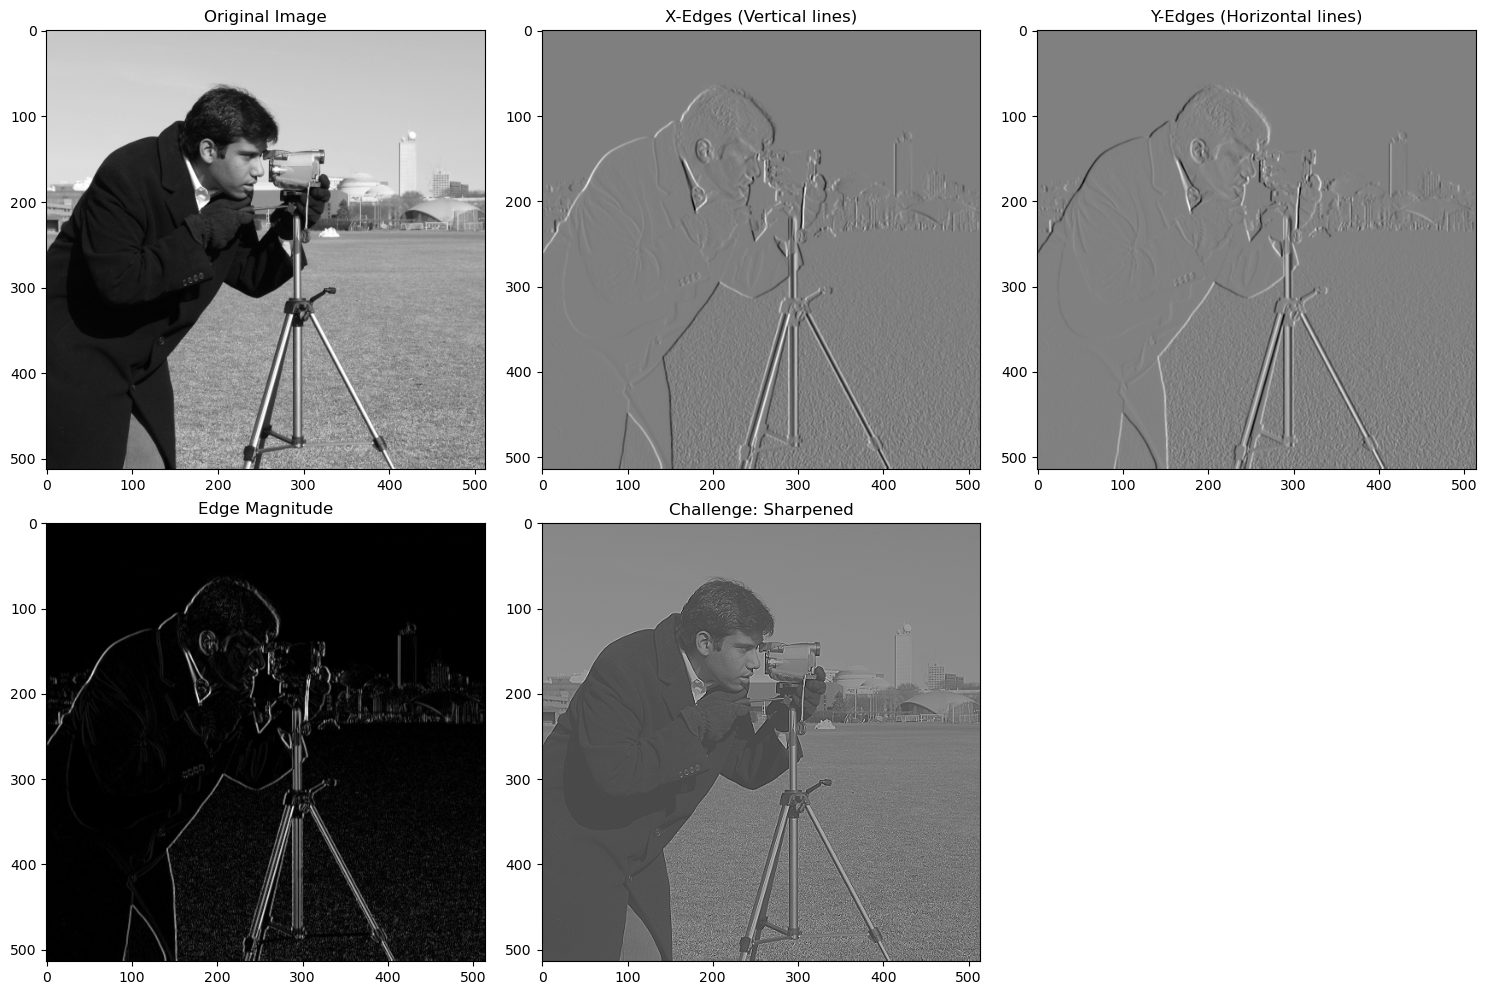

In [ ]:

from skimage import data
from scipy.signal import convolve2d
import matplotlib.pyplot as plt

# 1. Load a 2D grayscale image (a 2D matrix)
image_2d = data.camera()
print(f"Image matrix shape: {image_2d.shape}")

# 2. Define Sobel kernels
kernel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

kernel_y = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

# Sharpen kernel
kernel_sharpen = np.array([
    [ 0,  -1,  0],
    [ -1,  5,  -1],
    [ 0,  -1,  0]
])

# 3. Apply the kernels

edges_x = convolve2d(image_2d, kernel_x, mode="full", boundary="symm")
edges_y = convolve2d(image_2d, kernel_y, mode="full", boundary="symm")
sharpened_img = convolve2d(image_2d, kernel_sharpen, mode="full", boundary="symm")


# 4. Combine results for edge magnitude
# Calculate the edge magnitude: G = sqrt(Gx^2 + Gy^2) - The edge magnitude is combining the results of the two filters kernel_x and kernel_y 
import numpy as np
edge_magnitude = np.sqrt(edges_x**2 + edges_y**2) # 

# 5. Display 
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.title("Original Image")
plt.imshow(image_2d, cmap='gray')

plt.subplot(2, 3, 2)
plt.title("X-Edges (Vertical lines)")
plt.imshow(edges_x, cmap='gray')

plt.subplot(2, 3, 3)
plt.title("Y-Edges (Horizontal lines)")
plt.imshow(edges_y, cmap='gray')

plt.subplot(2, 3, 4)
plt.title("Edge Magnitude")
plt.imshow(edge_magnitude, cmap='gray')

plt.subplot(2, 3, 5)
plt.title("Challenge: Sharpened")
plt.imshow(sharpened_img, cmap='gray')

plt.tight_layout()
plt.show()

#### Analysis 
- First, kernel_x is highlighting vertical lines, by extinguishing the middle column on the kernel and highlighting the contrast between the left (-) and right (+) columns.
- Conversely, kernel_y is highlighting horizontal lines, by extinguishing the middle row on the kernel and highlighting the contrast between the top (-) and bottom (+) columns.
- Finally, kernel_sharpen enhances edges and detail. The kernel makes the image look crisper by exaggerating the difference between a pixel and its neighbors. 